In [1]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Convolution2D, BatchNormalization, DepthwiseConv2D, Activation, Conv2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_training_curves(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.show()

def save_model(model, file_path):
    model_json = model.to_json()
    with open('model.json', 'w') as json_file:
        json_file.write(model_json)    

def print_results(cm):
    tp = cm[0, 0]
    tn = cm[1, 1]
    fn = cm[0, 1]
    fp = cm[1, 0]
    
    acc = ((tp + tn) / (tp + tn + fp + fn)) * 100
    
    sen = (tp / (tp + fn)) * 100
    
    spe = (tn / ( tn + fp )) * 100
    
    print ('Accuracy: ',  acc)

    print ('Sensitivity: ', sen)
    
    print ('Sensibility: ',  spe)

In [3]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), strides = (2, 2), padding = 'same', use_bias = False, input_shape = (224, 224, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (2, 2), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (2, 2), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (2, 2), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(DepthwiseConv2D(kernel_size = (3, 3), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), strides = (1, 1), padding = 'same', use_bias = False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(2, activation = 'softmax'))
    
    return model

In [4]:
def train_model(model, train_batches, train_steps, class_weights, valid_batches, val_steps, callbacks):
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    history = model.fit_generator(train_batches,
                          steps_per_epoch = train_steps,
                          class_weight = class_weights,
                          validation_data = valid_batches,
                          validation_steps = val_steps,
                          epochs = 50,
                          verbose = 1,
                          callbacks = callbacks)
    
    return history

In [5]:
file_path = 'weights-mobilenet.h5'

callbacks = [
        ModelCheckpoint(file_path, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max'),
        ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 10, verbose = 1, mode = 'min', min_lr = 0.00001),
        ]

training_path = '../input/dermmel/DermMel/train_sep'
validation_path = '../input/dermmel/DermMel/valid'
test_path = '../input/dermmel/DermMel/test'

num_train_samples = 10682
num_val_samples = 3562
num_test_samples = 3561

train_batch_size = 16
val_batch_size = 16
test_batch_size = 16

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_val_samples / val_batch_size)

class_weights = {
        0: 4.1, # melanoma
        1: 1.0 # non-melanoma
}

train_batches = ImageDataGenerator(rescale = 1./255, samplewise_center = True).flow_from_directory(training_path,
                                target_size = (224, 224),
                                batch_size = val_batch_size,
                                class_mode = 'categorical')

valid_batches = ImageDataGenerator(rescale = 1./255, samplewise_center = True).flow_from_directory(validation_path,
                                    target_size = (224, 224),
                                    batch_size = val_batch_size,
                                    class_mode = 'categorical')

test_batches = ImageDataGenerator(rescale = 1./255, samplewise_center = True).flow_from_directory(test_path,
                                      target_size = (224, 224),
                                      batch_size = test_batch_size,
                                      class_mode = 'categorical',
                                      shuffle = False)

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [6]:
model = create_model()

history = train_model(model, train_batches, train_steps, class_weights, valid_batches, val_steps, callbacks)

save_model(model, file_path)
model.load_weights(file_path)

test_labels = test_batches.classes

predictions = model.predict_generator(test_batches, steps = val_steps, verbose = 1)

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
668/668 [==============================] - 163s 244ms/step - loss: 1.3706 - acc: 0.6478 - val_loss: 0.7807 - val_acc: 0.7111

Epoch 00001: val_acc improved from -inf to 0.71112, saving model to weights-mobilenet.h5
Epoch 2/50
668/668 [==============================] - 135s 202ms/step - loss: 0.9724 - acc: 0.6987 - val_loss: 0.6094 - val_acc: 0.7007

Epoch 00002: val_acc did not improve from 0.71112
Epoch 3/50
668/668 [==============================] - 135s 203ms/step - loss: 0.8650 - acc: 0.7239 - val_loss: 1.1286 - val_acc: 0.6960

Epoch 00003: val_acc did not improve from 0.71112
Epoch 4/50
668/668 [==============================] - 135s 203ms/step - loss: 0.6774 - acc: 0.7921 - val_loss: 0.2894 - val_acc: 0.8894

Epoch 00004: val_acc improve

Confusion matrix, without normalization
[[1554  227]
 [  12 1768]]


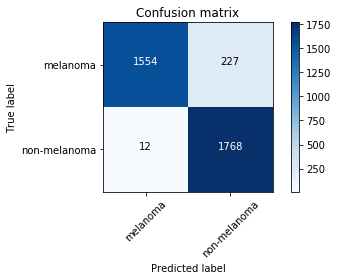

In [7]:
plot_confusion_matrix(cm, ['melanoma', 'non-melanoma'])

In [8]:
print_results(cm)

Accuracy:  93.28840213423196
Sensitivity:  87.25435148792813
Sensibility:  99.32584269662922


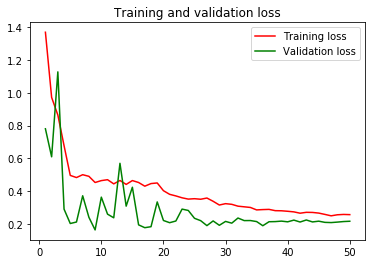

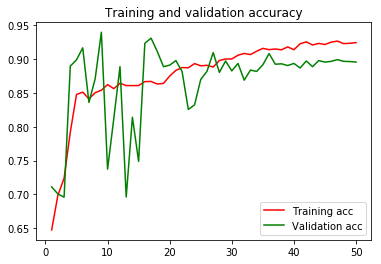

<Figure size 432x288 with 0 Axes>

In [9]:
plot_training_curves(history)